<a href="https://colab.research.google.com/github/Pavani7849/Lakshmi_INFO5502_Summer2022/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):



In [48]:
#### You code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [49]:
# df = pd.read_csv("https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv")
df = pd.read_csv("births.csv")

In [50]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [51]:
data = df.groupby(['month', 'day'])['births'].mean().reset_index()

In [52]:
data

,month,day,births
0,1,1.0,4009.225000
1,1,2.0,4247.400000
2,1,3.0,4500.900000
3,1,4.0,4571.350000
4,1,5.0,4603.625000
...,...,...,...
379,12,28.0,5044.200000
380,12,29.0,5120.150000
381,12,30.0,5172.350000
382,12,31.0,4859.200000


In [53]:
data['births'] = data['births'].astype('int')

In [54]:
data

,month,day,births
0,1,1.0,4009
1,1,2.0,4247
2,1,3.0,4500
3,1,4.0,4571
4,1,5.0,4603
...,...,...,...
379,12,28.0,5044
380,12,29.0,5120
381,12,30.0,5172
382,12,31.0,4859


In [55]:
data['month'] = data['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


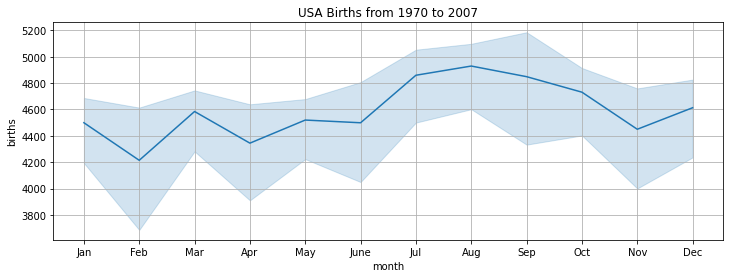

In [56]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data['month'], y=data['births'])
plt.grid(True)
plt.title("USA Births from 1970 to 2007")
plt.show()

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 


In [57]:
#### You code here
import numpy as np

In [58]:
conf_matrix = np.array([[157,46,25,22,15,3],
              [28,151,45,18,1,6],
              [11,38,135,14,3,7],
              [11,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,16]])

In [59]:
for i in range(len(conf_matrix)):
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/conf_matrix.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)
    
    print('Accuracy of class{} : {}'.format(i, accuracy))
    print('Precision of class{} : {}'.format(i, precision))
    print('Recall of class{} : {}'.format(i, recall))
    print('F1-Score of class{} : {}'.format(i, f1_score))
    print(" ")
    print("#####################################")


Accuracy of class0 : 0.8139303482587065
Precision of class0 : 0.585820895522388
Recall of class0 : 0.6738197424892703
F1-Score of class0 : 0.626746506986028
 
#####################################
Accuracy of class1 : 0.7850746268656716
Precision of class1 : 0.606425702811245
Recall of class1 : 0.5613382899628253
F1-Score of class1 : 0.583011583011583
 
#####################################
Accuracy of class2 : 0.8199004975124378
Precision of class2 : 0.6490384615384616
Recall of class2 : 0.5555555555555556
F1-Score of class2 : 0.598669623059867
 
#####################################
Accuracy of class3 : 0.8805970149253731
Precision of class3 : 0.5645161290322581
Recall of class3 : 0.5147058823529411
F1-Score of class3 : 0.5384615384615384
 
#####################################
Accuracy of class4 : 0.9213930348258706
Precision of class4 : 0.5333333333333333
Recall of class4 : 0.6511627906976745
F1-Score of class4 : 0.5863874345549738
 
#####################################
Accuracy o

In [60]:
#### You code here
def accuracy(arr):
    return np.round(np.sum(np.diagonal(test_confusion_matrix)) / np.sum(test_confusion_matrix), 2)
    
def recall(arr):
    return test_confusion_matrix.T[0][0] / np.sum(test_confusion_matrix.T[0][1:])

def precision(arr):
    return test_confusion_matrix[0][0] / np.sum(test_confusion_matrix[0][1:])

def f1_score(arr):
    precision_val = precision(arr)
    recall_val = recall(arr)
    return (2 * precision_val * recall_val) / (precision_val + recall_val)


def text_classification_performance(conf_arr):
    return {'Accuracy': accuracy(conf_arr), 'Recall':recall(conf_arr), 'Precision':precision(conf_arr), 'F1 Score':f1_score(conf_arr)}

In [61]:
test_confusion_matrix = np.array([[157, 46, 25, 22, 15, 3], [28, 151, 45, 18, 1, 6], [11, 38, 135, 14, 3, 7], [11, 15, 18, 70, 6, 4], [14, 12, 14, 7, 56, 2], [12, 7, 6, 5, 5, 16]])

In [62]:
text_classification_performance(test_confusion_matrix)

{'Accuracy': 0.58,
 'F1 Score': 1.6791443850267378,
 'Precision': 1.4144144144144144,
 'Recall': 2.0657894736842106}

<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [63]:
#### You code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# load data from git
df_intrude = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
df_normal = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

In [65]:
# setting column names
df_intrude.columns = ['PID', 'System_call']
df_normal.columns = ['PID', 'System_call']

In [66]:
df_normal['PID'].value_counts()

2669    266
168     241
167      34
Name: PID, dtype: int64

In [67]:
df_normal

,PID,System_call
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
536,2669,6
537,2669,6
538,2669,6
539,2669,6


In [68]:
intrusion_dict = {}
normal_dict = {}

# combining system calls
for PID in list(set(df_intrude['PID'].values)):
    intrusion_dict[PID] = " ".join(str(value) for value in list(df_intrude[df_intrude['PID'] == PID]['System_call'].values))

for PID in list(set(df_normal['PID'].values)):
    normal_dict[PID] = " ".join(str(value) for value in list(df_normal[df_normal['PID'] == PID]['System_call'].values))

intrusion_dict[167]

'90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1'

In [69]:
import re
from nltk.util import ngrams
intrusion_list = []
normal_list = []

# generating ngrams with sequence length of 25

for key in intrusion_dict.keys():
    s = intrusion_dict[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        intrusion_list.append(ele)
        
for key in normal_dict.keys():
    s = normal_dict[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for ele in list(ngrams(tokens, 25)):
        normal_list.append(ele) 

print(len(intrusion_list))
print(len(normal_list))

7627
469


In [70]:
intrusion_df = pd.DataFrame(intrusion_list)
normal_df = pd.DataFrame(normal_list)

# adding labels to intrusion and normal data sequences
intrusion_df['class'] = 1
normal_df['class'] = 0

print(intrusion_df.shape)
print(normal_df.shape)

(7627, 26)
(469, 26)


In [71]:
# combining intrusion and normal data frames 

combined_df = pd.DataFrame()

combined_df = combined_df.append(intrusion_df)
combined_df = combined_df.append(normal_df)

print(combined_df.shape)

(8096, 26)


In [72]:
# dropping duplicates...
combined_df = combined_df.drop_duplicates(subset = combined_df.columns[:-1], keep = 'last')
combined_df.shape

(333, 26)

In [73]:
combined_df['class'].value_counts()

1    177
0    156
Name: class, dtype: int64

In [74]:
combined_df.columns[:-1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='object')

In [75]:
# building a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# dropping target column
X = combined_df.drop("class", axis = 1)
y = combined_df['class']

# splitting dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

dtclassifier = DecisionTreeClassifier(max_depth = 10)
dtclassifier.fit(X_train, y_train)
y_pred = dtclassifier.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.93      0.89      0.91        45

    accuracy                           0.88        67
   macro avg       0.86      0.88      0.87        67
weighted avg       0.88      0.88      0.88        67



In [76]:
import re
from nltk.util import ngrams
import pandas as pd

cosine_similar_ngram = {}

for ngram in range(5, 26, 5):

    df_intrude = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
    df_normal = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

    df_intrude.columns = ['PID', 'System_call']
    df_normal.columns = ['PID', 'System_call']

    intrusion_dict = {}
    normal_dict = {}
    
    for PID in list(set(df_intrude['PID'].values)):
        intrusion_dict[PID] = " ".join(str(value) for value in list(df_intrude[df_intrude['PID'] == PID]['System_call'].values))

    for PID in list(set(df_normal['PID'].values)):
        normal_dict[PID] = " ".join(str(value) for value in list(df_normal[df_normal['PID'] == PID]['System_call'].values))

    intrusion_list = []
    normal_list = []
    for key in intrusion_dict.keys():
        s = intrusion_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            intrusion_list.append(ele)

    for key in normal_dict.keys():
        s = normal_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            normal_list.append(ele)

    intrusion_df = pd.DataFrame(intrusion_list)
    normal_df = pd.DataFrame(normal_list)

    intrusion_df['class'] = 1
    normal_df['class'] = 0

    combined_df = pd.DataFrame()

    combined_df = combined_df.append(intrusion_df)
    combined_df = combined_df.append(normal_df)

    #print(combined_df.shape)
    #print()


    combined_df = combined_df.drop_duplicates(subset = combined_df.columns[:-1], keep = 'last')
    #print(combined_df.shape)
    print()

    from sklearn.metrics.pairwise import cosine_similarity
    import statistics

    similarities_list = []
    for i in range(0, 100):
        list1 = list(combined_df[combined_df['class'] == 0].sample(n = 1).iloc[0, :].values)
        list2 = list(combined_df[combined_df['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
            similarities_list.append(cosine_similarity([list1], [list2]))
        except Exception as e:
            print(e)
            print(list1, list2)

    print(ngram, statistics.median(similarities_list)[0][0])
    print()
    cosine_similar_ngram[ngram] = statistics.median(similarities_list)[0][0]


5 0.7693988728726081


10 0.7080960477480411


15 0.714204369819949


20 0.7201673935246631


25 0.7227560649974982



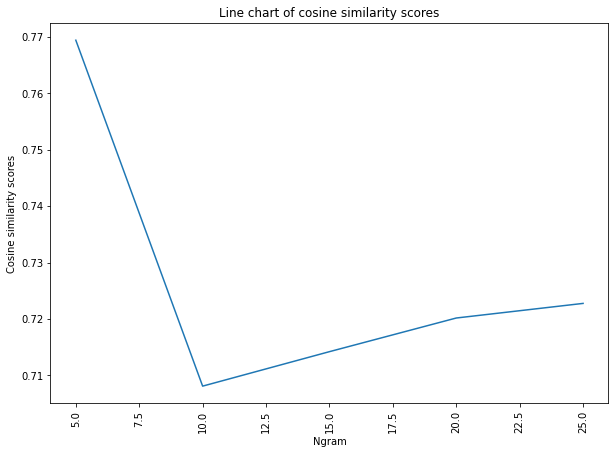

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating a dataframe of cosine similarity scores...
cosine_similar_ngram_df = pd.DataFrame({"Ngram":list(cosine_similar_ngram.keys()), "Similarity_scores": list(cosine_similar_ngram.values())})

# setting the figure parameters
plt.rcParams['figure.figsize'] = [10, 7]

# we iterate through each ngram range class and plot the cosine similarity value
sns.lineplot(x = "Ngram", y = "Similarity_scores", data = cosine_similar_ngram_df)
    
plt.title("Line chart of cosine similarity scores")
plt.xlabel("Ngram")
plt.ylabel("Cosine similarity scores")
plt.xticks(rotation = 90)
plt.show()

<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [78]:
#### You code and your answer here here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


In [79]:
df = pd.read_csv("Software_Reviews_csv_files_S.csv")

In [80]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [81]:
group_a = df[(df['incentivized'] == "NominalGift") | (df['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
group_b = df[(df['incentivized'] == "NoIncentive") | (df['incentivized'] == "NonNominalGift") | (df['incentivized'] == "VendorReferred")]['OverAllRating']

In [82]:
N_con = group_a.shape[0]
N_exp = group_b.shape[0]

In [83]:
# Significance Level
alpha = 0.05

In [84]:

# Calculating means of control and experimental groups
mu_con = np.mean(group_a)
mu_exp = np.mean(group_b)

In [85]:
y1 = group_a.astype('float64')
variance_con = np.var(y1)

y2 = group_b.astype('float64')
variance_exp = np.var(y2)

In [86]:
# Pooled Variance
pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

In [87]:
# Test statistics
T = (mu_con-mu_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [88]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(T)*2

In [89]:
# Z-critical value
Z_crit  = norm.ppf(1-alpha/2)

In [90]:
# Margin of error
m = Z_crit*pooled_variance

In [91]:
# Confidence Interval
CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [92]:
print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

Test Statistics stat:  nan
Z-critical:  1.959963984540054
P_value:  nan
Confidence Interval of 2 sample Z-test for proportions:  [nan nan]


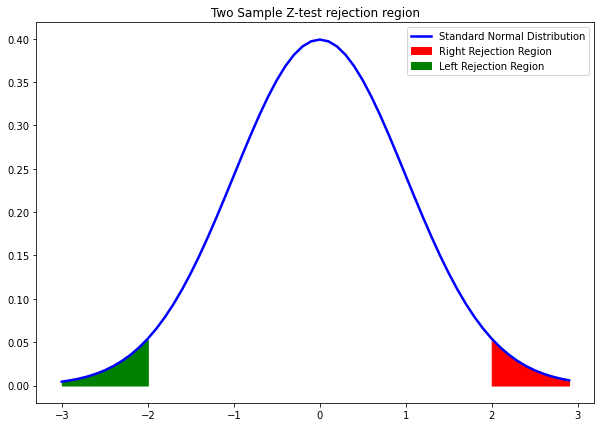

In [93]:
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'blue',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='r' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='g' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()